<a href="https://colab.research.google.com/github/Dilavarj7/World_Bank_Education_Stats/blob/main/Dilavar_Singh_Team_7_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path='/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Day 1 to 5/dat/'
EdStatsCountry_Series_df= pd.read_csv(path + 'EdStatsCountry-Series.csv')
EdStatsCountry_df= pd.read_csv(path + 'EdStatsCountry.csv')
EdStatsData_df= pd.read_csv(path + 'EdStatsData.csv')
EdStatsFootNote_df= pd.read_csv(path + 'EdStatsFootNote.csv')
EdStatsSeries_df= pd.read_csv(path + 'EdStatsSeries.csv')

In [5]:
#deleted unwanted columns
del EdStatsCountry_Series_df['Unnamed: 3']
del EdStatsCountry_df['Unnamed: 31']
del EdStatsData_df['Unnamed: 69']
del EdStatsFootNote_df['Unnamed: 4']
EdStatsSeries_df.drop(['Unit of measure','Notes from original source','Related source links','Other web links','Related indicators','License Type','Unnamed: 20'], axis=1, inplace=True)

1.Analysis and visualization for **EdStatsCountry_Series** DataFrame !.

In [ ]:
EdStatsCountry_Series_df.head(5)

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


In [ ]:
EdStatsCountry_Series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB


In [ ]:
EdStatsCountry_Series_df['DESCRIPTION'][0]

'Data sources : United Nations World Population Prospects'

In [ ]:
EdStatsCountry_Series_df['SeriesCode'].nunique()

21

In [ ]:
EdStatsCountry_Series_df['CountryCode'].nunique()

211

In [ ]:
EdStatsCountry_Series_df['DESCRIPTION'].nunique()

97

In [ ]:
graph_btw_series_code_and_description=EdStatsCountry_Series_df.groupby('SeriesCode')['DESCRIPTION'].count()
graph_btw_series_code_and_description
#this is basically same as below one-So we need to draw the graph for any one of them.

SeriesCode
NY.GDP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
NY.GDP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.MKTP.PP.CD     14
NY.GNP.PCAP.CD         6
NY.GNP.PCAP.PP.CD     19
SP.POP.0014.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.TO         4
SP.POP.0014.TO.ZS     13
SP.POP.1564.FE.IN      4
SP.POP.1564.MA.IN      4
SP.POP.1564.TO         4
SP.POP.1564.TO.ZS     13
SP.POP.GROW          211
SP.POP.TOTL          211
SP.POP.TOTL.FE.ZS     13
SP.POP.TOTL.MA.ZS     13
Name: DESCRIPTION, dtype: int64

In [ ]:
EdStatsCountry_Series_plot_graph_of_series_code=EdStatsCountry_Series_df['SeriesCode'].value_counts()
EdStatsCountry_Series_plot_graph_of_series_code 

SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.MKTP.PP.CD     14
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
SP.POP.1564.TO.ZS     13
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.TOTL.MA.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.MA.IN      4
SP.POP.1564.FE.IN      4
SP.POP.0014.FE.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
Name: SeriesCode, dtype: int64

Text(0.5, 0, 'Series Code')

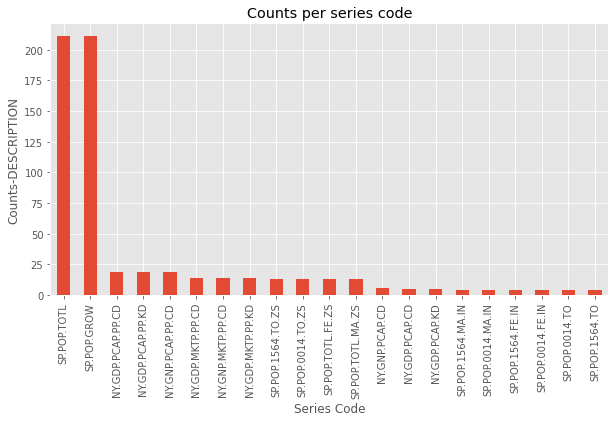

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
EdStatsCountry_Series_plot_graph_of_series_code.plot(kind='bar')

plt.title('Counts per series code')
plt.ylabel('Counts-DESCRIPTION')
plt.xlabel('Series Code')

2. Analysis for our 2nd DataFrame that is **EdStatsCountry_df**.

In [ ]:
EdStatsCountry_df.head(1)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN


In [ ]:
EdStatsCountry_df.dropna(subset=['Region'], inplace=True)

In [ ]:
EdStatsCountry_df=EdStatsCountry_df.reset_index()

In [ ]:
EdStatsCountry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   index                                              214 non-null    int64  
 1   Country Code                                       214 non-null    object 
 2   Short Name                                         214 non-null    object 
 3   Table Name                                         214 non-null    object 
 4   Long Name                                          214 non-null    object 
 5   2-alpha code                                       211 non-null    object 
 6   Currency Unit                                      214 non-null    object 
 7   Special Notes                                      120 non-null    object 
 8   Region                                             214 non-null    object 
 9   Income Gro

In [ ]:
EdStatsCountry_df['Region'].nunique()

7

In [ ]:
country_code_value_count_per_region=EdStatsCountry_df.groupby('Region')['Country Code'].count()
country_code_value_count_per_region

Region
East Asia & Pacific           36
Europe & Central Asia         57
Latin America & Caribbean     41
Middle East & North Africa    21
North America                  3
South Asia                     8
Sub-Saharan Africa            48
Name: Country Code, dtype: int64

Text(0.5, 0, 'Region')

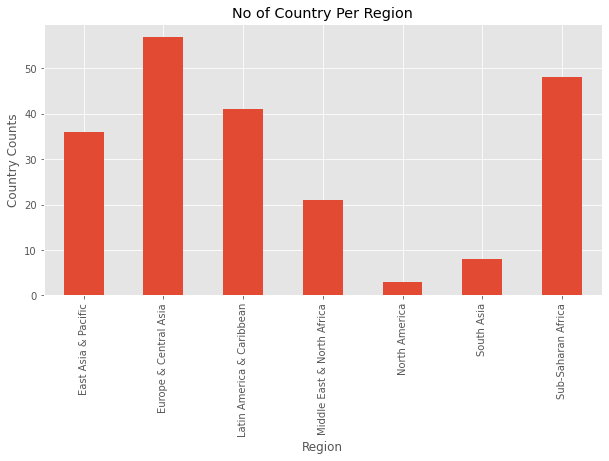

In [ ]:
country_code_value_count_per_region.plot(kind='bar')

plt.title('No of Country Per Region')
plt.ylabel('Country Counts')
plt.xlabel('Region')

In [ ]:
value_count_for_income_group=EdStatsCountry_df['Income Group'].value_counts()
value_count_for_income_group

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

Text(0.5, 0, 'Income Group')

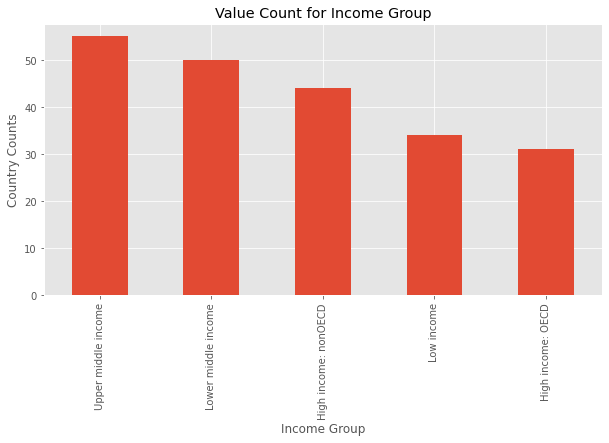

In [ ]:
value_count_for_income_group.plot(kind='bar')

plt.title('Value Count for Income Group')
plt.ylabel('Country Counts')
plt.xlabel('Income Group')

3.Data Analysis for our most important DataFrame which has information about Country name and Indicator code...**EdStatsData_df**.

In [6]:
EdStatsData_df.groupby('Country Name')['Indicator Name'].count()

Country Name
Afghanistan           3665
Albania               3665
Algeria               3665
American Samoa        3665
Andorra               3665
                      ... 
West Bank and Gaza    3665
World                 3665
Yemen, Rep.           3665
Zambia                3665
Zimbabwe              3665
Name: Indicator Name, Length: 242, dtype: int64

In [7]:
Indicator_name_lst=[]
Indicator_name_lst.append('Gross enrolment ratio, pre-primary, both sexes (%)')
Indicator_name_lst.append('Adjusted net enrolment rate, primary, both sexes (%)')
Indicator_name_lst.append('Annual statutory teacher salaries in public institutions in USD. Pre-Primary. Starting salary')
Indicator_name_lst.append('Barro-Lee: Percentage of female population age 15-19 with no education')
Indicator_name_lst.append('Adult literacy rate, population 15+ years, both sexes (%)')

In [8]:
Indicator_name_lst

['Gross enrolment ratio, pre-primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Annual statutory teacher salaries in public institutions in USD. Pre-Primary. Starting salary',
 'Barro-Lee: Percentage of female population age 15-19 with no education',
 'Adult literacy rate, population 15+ years, both sexes (%)']

For Indicator :Gross enrolment ratio, pre-primary, both sexes (%)


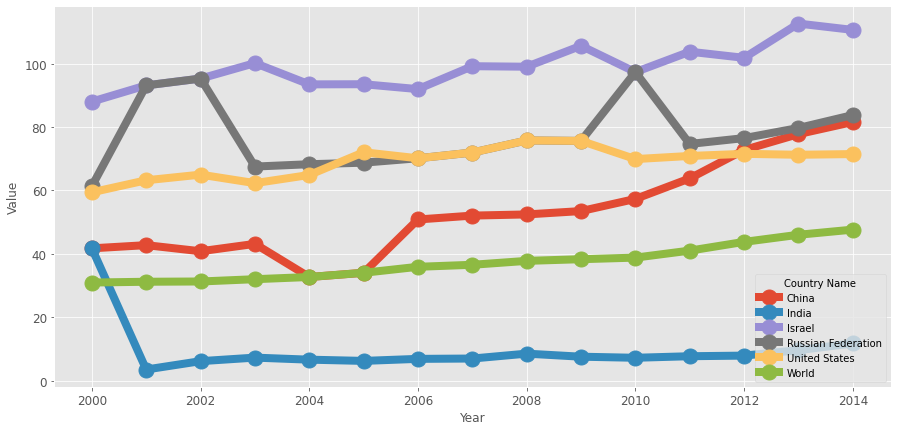

For Indicator :Adjusted net enrolment rate, primary, both sexes (%)


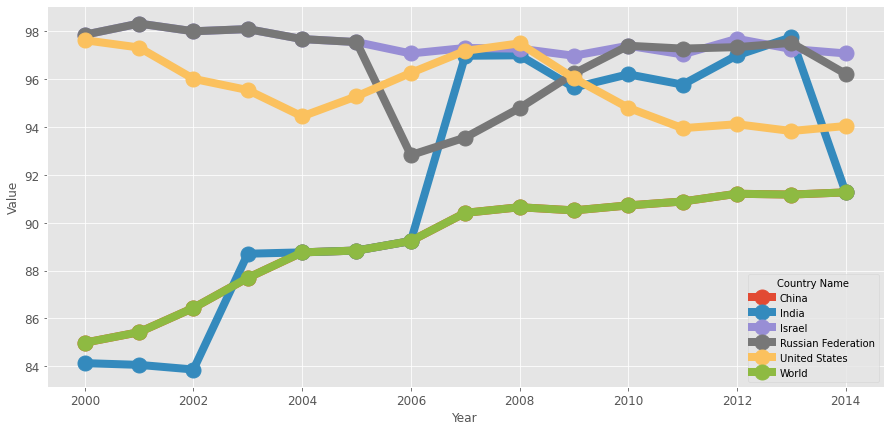

For Indicator :Annual statutory teacher salaries in public institutions in USD. Pre-Primary. Starting salary


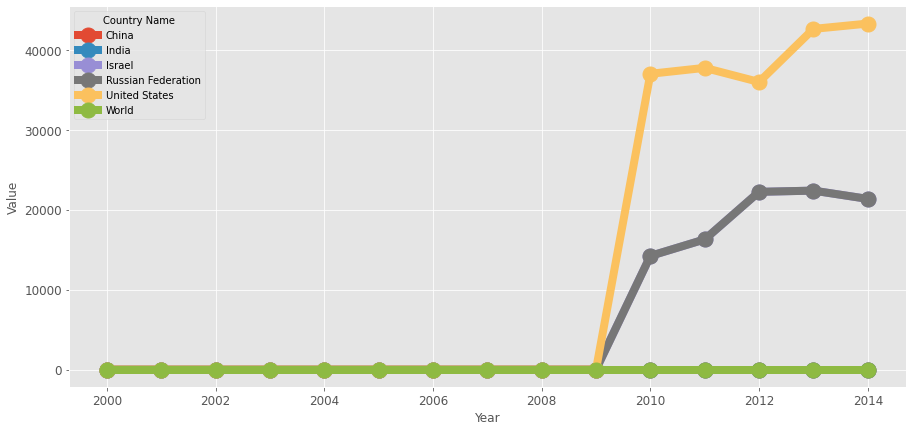

For Indicator :Barro-Lee: Percentage of female population age 15-19 with no education


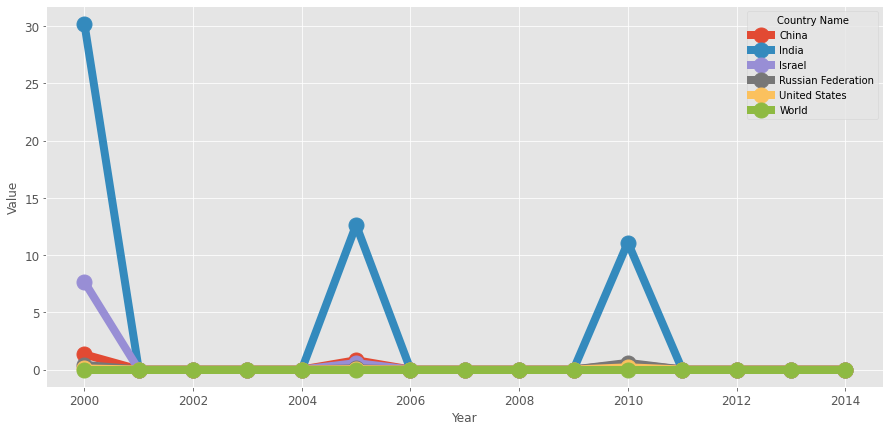

For Indicator :Adult literacy rate, population 15+ years, both sexes (%)


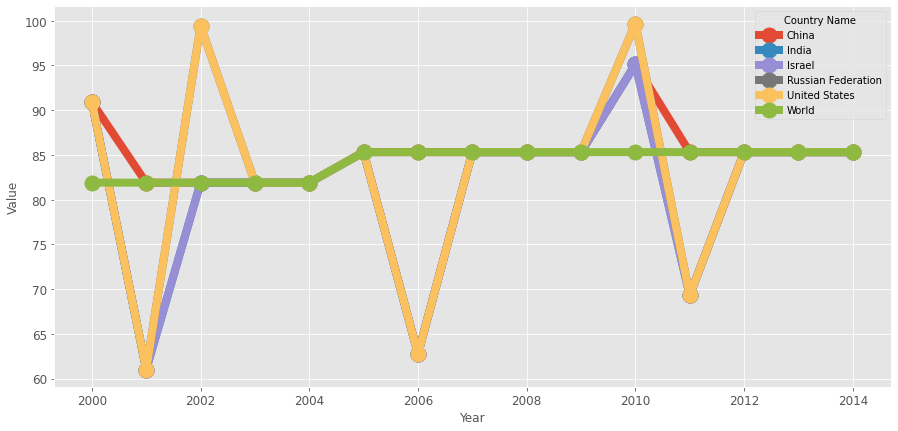

In [31]:
#final code where we are plotting map to see which country is alike and which one isdiiferent 
for indicator_name in Indicator_name_lst:
  EdStatsData_precise_df=EdStatsData_df[['Country Name','Country Code','Indicator Name','Indicator Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
  EdStatsData_precise_df=EdStatsData_precise_df[(EdStatsData_df["Country Name"]=='World') | (EdStatsData_df["Country Name"]=='India') | (EdStatsData_df["Country Name"]=='China') 
  | (EdStatsData_df["Country Name"]=='United States') | (EdStatsData_df["Country Name"]=='Russian Federation') | (EdStatsData_df["Country Name"]=='Israel')]
  df4=EdStatsData_precise_df[EdStatsData_precise_df["Indicator Name"]==indicator_name]
  new_df=df4.fillna(method='ffill')
  new_df.reset_index()
  #del new_df['index']
  df_compare=new_df.groupby('Country Name')[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']].sum()
  #print(df_compare)
  df_compare=df_compare.T
  df_compare=df_compare.rename(columns={"Country Name": "Year"})
  #print(f'For Indicator :{indicator_name}')
  plt.style.use('ggplot')
  ax = df_compare.plot(figsize=(15,7),legend=True, fontsize=12 ,linewidth=8, marker="o",markersize=15)
  ax.set_title(print(f'For Indicator :{indicator_name}'))
  ax.set_xlabel("Year",fontsize=12)
  ax.set_ylabel("Value",fontsize=12)
  plt.show()

###<u> Continue..... </u>

4.Analysis for our 4th DataFrame that is **EdStatsFootNote_df**.

In [ ]:
EdStatsFootNote_df.head()

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.


In [ ]:
EdStatsFootNote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CountryCode  643638 non-null  object
 1   SeriesCode   643638 non-null  object
 2   Year         643638 non-null  object
 3   DESCRIPTION  643638 non-null  object
dtypes: object(4)
memory usage: 19.6+ MB


In [ ]:
year_vs_series_code=EdStatsFootNote_df.groupby('Year')['SeriesCode'].count()

Text(0.5, 0, 'Year')

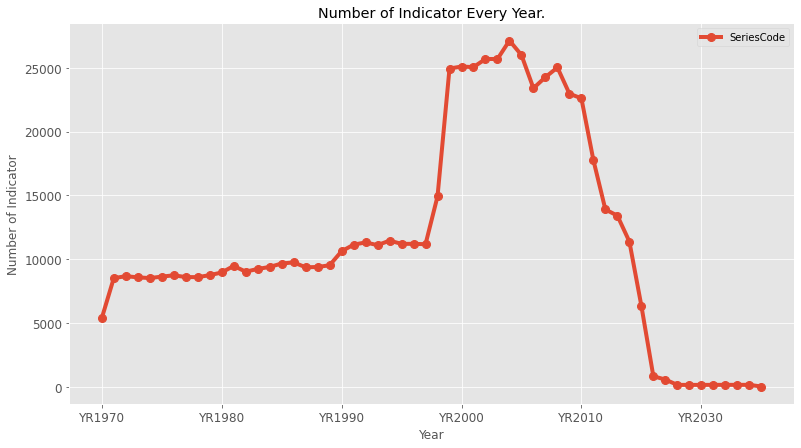

In [ ]:
plt.rcParams['figure.figsize'] = (13, 7)
year_vs_series_code.plot(legend=True, fontsize=12 ,linewidth=4, marker="o",markersize=8)
plt.title('Number of Indicator Every Year.')
plt.ylabel('Number of Indicator')
plt.xlabel('Year')

In [ ]:
df3=EdStatsFootNote_df[(EdStatsFootNote_df['Year']=='YR2002')| (EdStatsFootNote_df['Year']=='YR2003')| (EdStatsFootNote_df['Year']=='YR2004')| (EdStatsFootNote_df['Year']=='YR2005') | (EdStatsFootNote_df['Year']=='YR2006') 
| (EdStatsFootNote_df['Year']=='YR2007') | (EdStatsFootNote_df['Year']=='YR2008') | (EdStatsFootNote_df['Year']=='YR2009') | (EdStatsFootNote_df['Year']=='YR2010') 
| (EdStatsFootNote_df['Year']=='YR2011') | (EdStatsFootNote_df['Year']=='YR2012') | (EdStatsFootNote_df['Year']=='YR2013') | (EdStatsFootNote_df['Year']=='YR2014') ]
df3=df3[(df3['CountryCode']=='IND') | (df3['CountryCode']=='WLD') | (df3['CountryCode']=='RUS') | (df3['CountryCode']=='USA') | (df3['CountryCode']=='CHN') | (df3['CountryCode']=='ISL')]
df3=df3.reset_index()

In [ ]:
del df3['index']

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7585 entries, 0 to 7584
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  7585 non-null   object
 1   SeriesCode   7585 non-null   object
 2   Year         7585 non-null   object
 3   DESCRIPTION  7585 non-null   object
dtypes: object(4)
memory usage: 237.2+ KB


In [ ]:
df3['CountryCode'].nunique()

6

In [ ]:
counts_of_series_code_per_year=df3.groupby('Year')['SeriesCode'].count()

In [ ]:
counts_of_series_code_per_year

Year
YR2002    649
YR2003    645
YR2004    674
YR2005    626
YR2006    706
YR2007    654
YR2008    634
YR2009    640
YR2010    538
YR2011    292
YR2012    564
YR2013    583
YR2014    380
Name: SeriesCode, dtype: int64

Text(0.5, 0, 'Year')

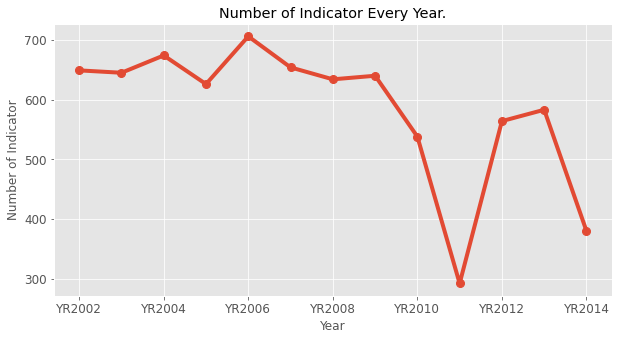

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
counts_of_series_code_per_year.plot(fontsize=12 ,linewidth=4, marker="o",markersize=8)
plt.title('Number of Indicator Every Year.')
plt.ylabel('Number of Indicator')
plt.xlabel('Year')

In [ ]:
df3.head(3)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,CHN,SE.SEC.TCHR.FE,YR2003,Country estimation.
1,CHN,SE.SEC.ENRL.GC.FE,YR2008,Country estimation.
2,CHN,SE.SEC.ENRL.GC.FE,YR2006,Country estimation.


In [ ]:
no_of_indicator_per_country=df3.groupby('CountryCode')['SeriesCode'].count()

Text(0.5, 0, 'CountryCode')

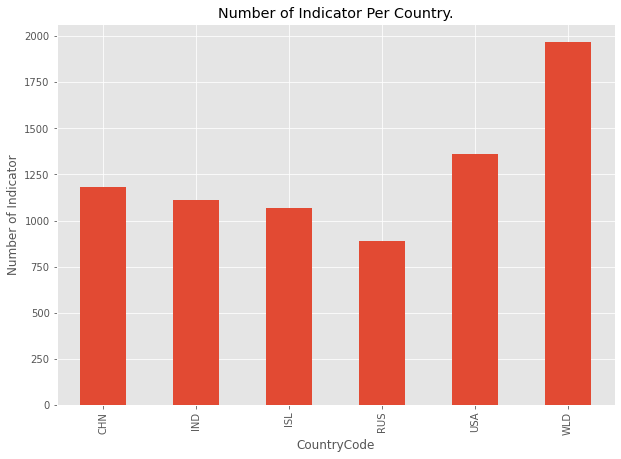

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7)
no_of_indicator_per_country.plot(kind='bar')
plt.title('Number of Indicator Per Country.')
plt.ylabel('Number of Indicator')
plt.xlabel('CountryCode')

5. Analysis of **EdStatsSeries_df** DataFrame.

In [ ]:
EdStatsSeries_df.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN


In [ ]:
EdStatsSeries_df.info()

In [ ]:
df4=EdStatsSeries_df

In [ ]:
df4['Topic'].nunique()

37

In [ ]:
no_of_series_code_per_topic=df4.groupby('Topic')['Series Code'].count()

Text(0.5, 0, 'Topic')

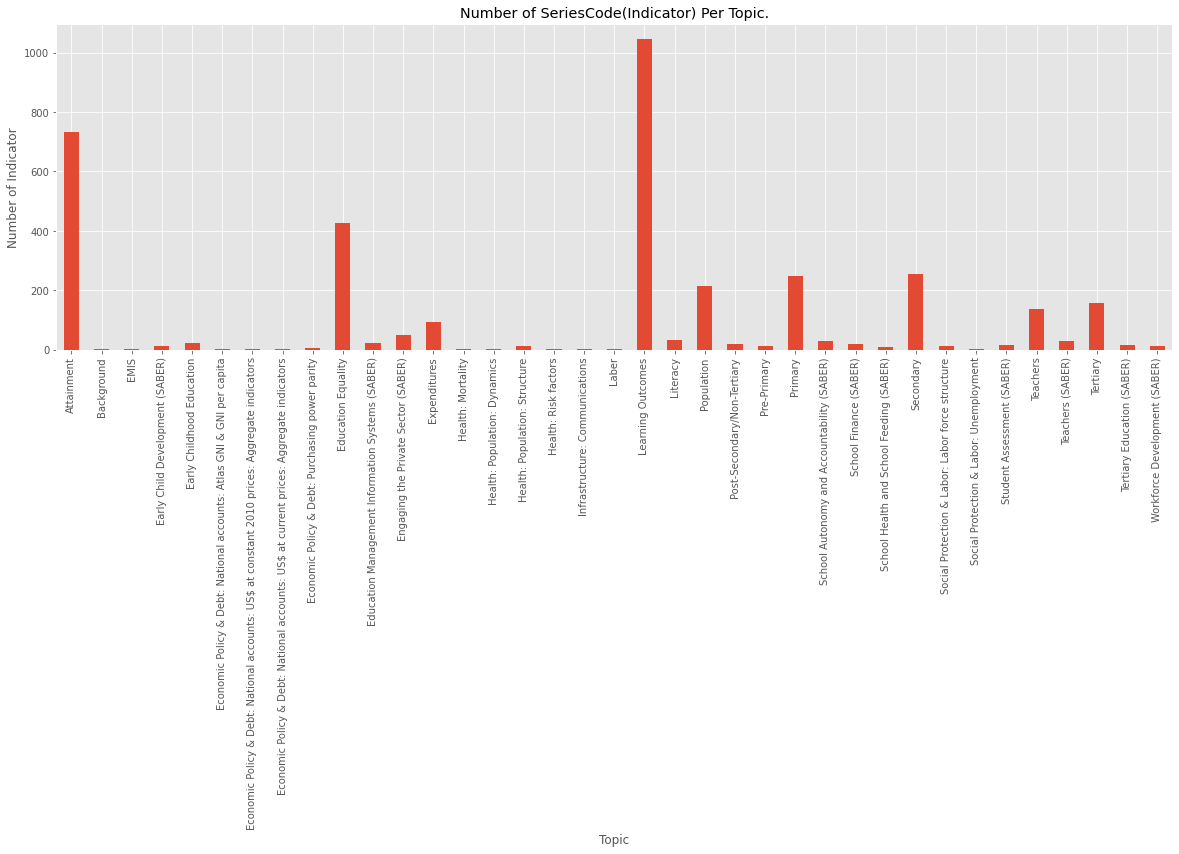

In [ ]:
plt.rcParams['figure.figsize'] = (20,6)
no_of_series_code_per_topic.plot(kind='bar')
plt.title('Number of SeriesCode(Indicator) Per Topic.')
plt.ylabel('Number of Indicator')
plt.xlabel('Topic')

Text(0.5, 0, 'Base Period')

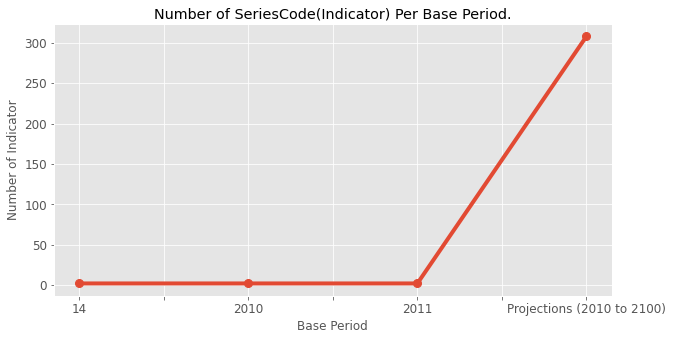

In [ ]:
#plotline 
plt.rcParams['figure.figsize'] = (10, 5)
df4.groupby('Base Period')['Series Code'].count().plot(fontsize=12 ,linewidth=4, marker="o",markersize=8)
plt.title('Number of SeriesCode(Indicator) Per Base Period.')
plt.ylabel('Number of Indicator')
plt.xlabel('Base Period')

Text(0.5, 0, 'Base Period')

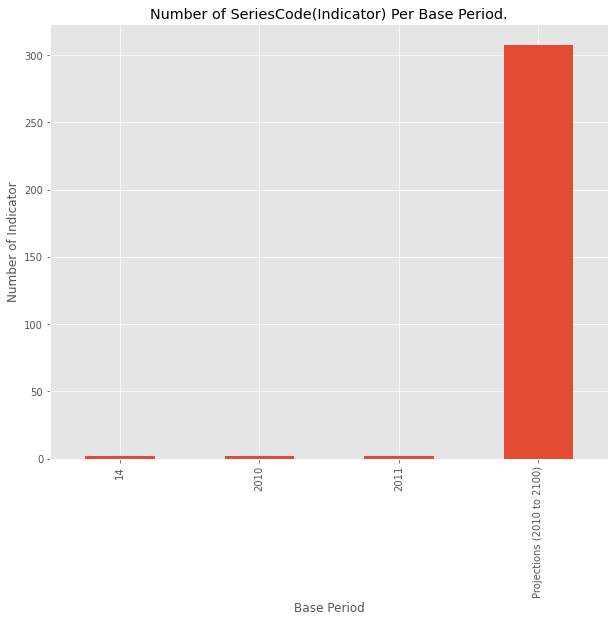

In [ ]:
#bar plot 
plt.rcParams['figure.figsize'] = (10, 8)
df4.groupby('Base Period')['Series Code'].count().plot(kind='bar')
plt.title('Number of SeriesCode(Indicator) Per Base Period.')
plt.ylabel('Number of Indicator')
plt.xlabel('Base Period')